In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
plt.style.use('fivethirtyeight') # специальное отображение графиков для pyplot
import math
from sklearn import datasets
import random
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
import os
# os.chdir('D:/Универ/Асперантура/Работа над диссером и наукой/Работа со статистикой')

### Xi- наблюдения 

In [4]:
Xi = np.array([(0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95)])
Xi
# Точки в которых я наблюдаю y

array([[0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]])

In [5]:
Xi1 = pd.DataFrame({'x':[0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]}).values
Xi1

array([[0.05],
       [0.15],
       [0.25],
       [0.35],
       [0.45],
       [0.55],
       [0.65],
       [0.75],
       [0.85],
       [0.95]])

### x - переменная в функции rcap

In [6]:
x = pd.DataFrame({'x':[0.1, 0.2 , 0.3 , 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}).values
x #переменная

array([[0.1],
       [0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6],
       [0.7],
       [0.8],
       [0.9],
       [1. ]])

### Генератор случайных чисел Ei.

In [7]:
J=10
mu = 0.0
q=1
E = [random.gauss(mu, q) for i in range(J)]
E= (pd.DataFrame(E,columns=['E'])).values

### Расчёт Yi

In [22]:
def randomreg(x):
    for i in x:
        Yi=10+1.8*(x**2) # формула расчёта Yi относительно заданных xi;
    return Yi
Yi = randomreg(Xi1)

Yi = Yi+E
Yi

array([[10.38511844],
       [ 9.54892034],
       [11.4618911 ],
       [ 9.71335212],
       [11.04760748],
       [10.31263727],
       [11.75200352],
       [12.21069434],
       [11.87689045],
       [10.94529884]])

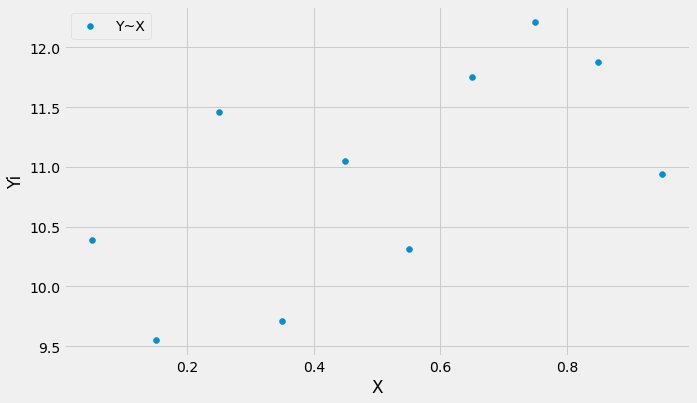

<Figure size 432x288 with 0 Axes>

In [23]:
# Диаграмма рассеивания 
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(Xi , Yi, label = 'Y~X')
plt.xlabel('X')
plt.ylabel('Yi')
plt.legend(loc = 'upper left')
plt.show()
plt.savefig('saved_figure.png', )

In [24]:
# x - не случайны
# x - случайны

## Строим непараметрическую регрессию

#### 2. Строим непараметрическую- ядерную регрессию 

In [25]:
def kernel(z):
    return (1.0 / np.sqrt(2 * np.pi)) * np.exp(- 0.5 * z ** 2)


def kernelreg(x,X,Y,K,h):
    W = K((x-X)/h)
    rcap = sum(Y*W)/sum(W)
    return rcap


rcap = kernelreg(x,Xi,Yi,K=kernel,h=0.14)
rcap

array([10.22660771, 10.2792608 , 10.38121447, 10.48299584, 10.60027597,
       10.83158927, 11.19855703, 11.54700942, 11.67771935, 11.58508093])

#### 3 Визуализируем полученные результаты

In [26]:
rcap

array([10.22660771, 10.2792608 , 10.38121447, 10.48299584, 10.60027597,
       10.83158927, 11.19855703, 11.54700942, 11.67771935, 11.58508093])

In [27]:
rcap = np.array(rcap).reshape(-1, 1)

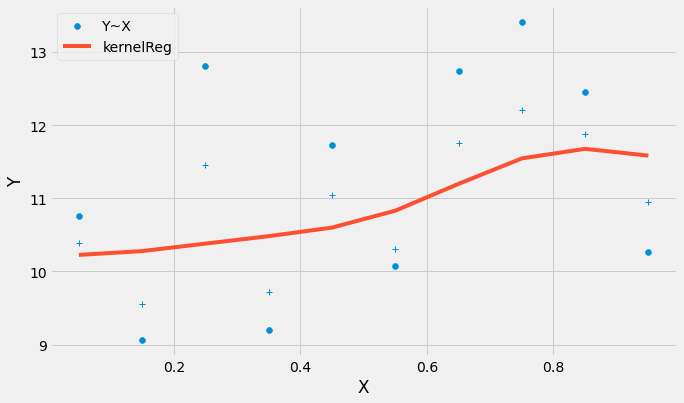

In [28]:
# Диаграмма рассения:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(Xi, Yi+E, label = 'Y~X')
plt.xlabel('X')
plt.ylabel('Y')

# Накладываем регрессионную модель на данные:
plt.plot(Xi1, Yi, '+')
plt.plot(Xi1, rcap, label = 'kernelReg' )
plt.legend(loc = 'upper left')
plt.show()

#### 4. Предсказываем колличественные данные с помошью непараметрическую- ядерную регрессию:

In [29]:
rcap

array([[10.22660771],
       [10.2792608 ],
       [10.38121447],
       [10.48299584],
       [10.60027597],
       [10.83158927],
       [11.19855703],
       [11.54700942],
       [11.67771935],
       [11.58508093]])

##### 5. Тест на ошибки модели:

In [30]:
# 1. Абсолютное отклонение:
abe = mean_absolute_error(Yi,rcap)

# 2.Среднеквадратичное отклонение(СКО):
std = mean_squared_error(Yi,rcap)

# 3.Стандартная относительная ошибка:
#Числитель:
are1 = np.sum(abs(Yi - rcap))
#Знаменатель:
are2 = np.sum(abs(Yi))
#Формула( В '%')
are = (1/10)*(are1/are2)*100

# 4.Выводим резульаты:
print("KernelReg")
print('АО :', abe)
print('СКО :', std)
print('Стандарт.относит.откл. :', float(are))

KernelReg
АО : 0.5761539648845684
СКО : 0.3983923872681174
Стандарт.относит.откл. : 0.5273507443302936
